In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
import kagglehub

# Force download again
path = kagglehub.dataset_download("sartajbhuvaji/brain-tumor-classification-mri", force_download=True)

print("Dataset path:", path)


Dataset path: /kaggle/input/brain-tumor-classification-mri


In [ ]:
%ls /root/.cache/kagglehub/datasets/sartajbhuvaji/brain-tumor-classification-mri/versions/2

ls: cannot access '/root/.cache/kagglehub/datasets/sartajbhuvaji/brain-tumor-classification-mri/versions/2': No such file or directory


In [ ]:
!mkdir mri

mkdir: cannot create directory ‘mri’: File exists


In [ ]:
!pwd

/content


In [ ]:
%mv /root/.cache/kagglehub/datasets/sartajbhuvaji/brain-tumor-classification-mri/versions/2 /content/mri

mv: cannot stat '/root/.cache/kagglehub/datasets/sartajbhuvaji/brain-tumor-classification-mri/versions/2': No such file or directory


In [ ]:
%ls /content/mri/2

ls: cannot access '/content/mri/2': No such file or directory


In [ ]:
import os

# This will recursively walk through all folders inside /content/mri
for dirname, _, filenames in os.walk('/content/mri'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [ ]:
from sklearn.metrics import accuracy_score #to measure accuracy
import ipywidgets as widgets #interactive widgets(sliders,buttons)
import io #read/write data
from PIL import Image #Python imaging Library for resizing or filtering images
import tqdm #progress bar library used to show progress
from sklearn.model_selection import train_test_split #split training & testing datasets
import cv2 #OpenCV
from sklearn.utils import shuffle #to randomly rearrange so that model gets more generalised

In [ ]:
import os
import cv2
import numpy as np

xtrain = []
ytrain = []
image_size = 150
labels = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

# Training
for label in labels:
    folderPath = os.path.join('/kaggle/input/brain-tumor-classification-mri/Training', label)
    for filename in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath, filename))
        img = cv2.resize(img, (image_size, image_size))
        xtrain.append(img)
        ytrain.append(label)

# Testing
for label in labels:
    folderPath = os.path.join('/kaggle/input/brain-tumor-classification-mri/Testing', label)
    for filename in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath, filename))
        img = cv2.resize(img, (image_size, image_size))
        xtrain.append(img)
        ytrain.append(label)

# Convert to NumPy arrays
xtrain = np.array(xtrain)
ytrain = np.array(ytrain)

In [ ]:
#images, dim-X, dim-Y, Color channel RGB
xtrain.shape   #to check the dimensions of the training dataset
"""3264 images
Each image is 150×150 pixels
3 channels (RGB)"""

'3264 images\nEach image is 150×150 pixels\n3 channels (RGB)'

In [ ]:
ytrain.shape
#3264 labels, corresponding to the images.
"""This check is especially useful after reshaping, resizing,
or augmenting images, ensuring that no unintended modifications occurred."""

'This check is especially useful after reshaping, resizing,\nor augmenting images, ensuring that no unintended modifications occurred.'

In [ ]:
#Shuffle all images wrt to lables to increase randomness
xtrain, ytrain = shuffle(xtrain, ytrain, random_state=101)
xtrain.shape
"""When loading images from folders, they are arranged in order of categories
 (ex, all glioma images first, then meningioma).
This order might introduce bias when training the model."""

'When loading images from folders, they are arranged in order of categories\n (ex, all glioma images first, then meningioma).\nThis order might introduce bias when training the model.'

In [ ]:
#train-test split
xtrain1, xtest1, ytrain1, ytest1 = train_test_split(xtrain, ytrain, test_size=0.2, random_state=123)
"""Machine learning models require two datasets
Training Set (80%): Used train  model.
Testing Set (20%): Used to evaluate the models perfrmnce.
train_testsplit divides the dataset into these two sets."""



'Machine learning models require two datasets\nTraining Set (80%): Used train  model.\nTesting Set (20%): Used to evaluate the models perfrmnce.\ntrain_testsplit divides the dataset into these two sets.'

In [ ]:
xtrain1.shape #xtrain, ytrain: The shuffled dataset (images and labels

(2611, 150, 150, 3)

In [ ]:
ytrain1.shape
"""2,611 images in the training set.
653 images in the testing set.
Each image is 150×150 pixels with 3 color channels (RGB)"""

'2,611 images in the training set.\n653 images in the testing set.\nEach image is 150×150 pixels with 3 color channels (RGB)'

In [ ]:
xtest1.shape

(653, 150, 150, 3)

In [ ]:
ytest1.shape

(653,)

In [ ]:
ytrain1[0]

np.str_('glioma_tumor')

In [ ]:
ytrain_new = []  #labels must be in numerical format which is in string as of now
#encoding dep vars
myencoder = {
    'glioma_tumor' : 0,
    'meningioma_tumor': 1,
    'no_tumor': 2,
    'pituitary_tumor' : 3
}

for i in range(len(ytrain1)):
  ytrain_new.append(myencoder[ytrain1[i]])

ytrain_new = np.array(ytrain_new) #into array for fatser comput.
ytrain_new.shape

(2611,)

In [ ]:
np.unique(ytrain_new)

array([0, 1, 2, 3])

In [ ]:
ytest_new = [] # same process for testing labels
#encoding dep vars
'''myencoder = {
    'glioma_tumor' : 0,
    'meningioma_tumor': 1,
    'no_tumor': 2,
    'pituitary_tumor' : 3
}'''

for i in range(len(ytest1)):
  ytest_new.append(myencoder[ytest1[i]])

ytest_new = np.array(ytest_new)
ytest_new.shape

(653,)

In [ ]:
np.unique(ytest_new)
 #Confirms that the training and testing labels contain all four categories (0, 1, 2, 3).

array([0, 1, 2, 3])

In [ ]:
ytest = ytest_new #Testing images.
xtrain = xtrain1 #Training images.
ytrain = ytrain_new #Numerically encoded training labels.
xtest = xtest1 #
ytest = ytest_new #

In [ ]:
#shape and label This verifies that our dataset is correctly structured before training.
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(2611, 150, 150, 3)
(2611,)
(653, 150, 150, 3)
(653,)


In [ ]:
#(2611, 150, 150, 3)  2611 training images, each 150x150 pixels, 3 color channels (RGB).

In [ ]:
ytest1 = ytest.reshape(len(ytest),1) #Since ytrain and ytest are one-dimensional arrays, reshaping converts them into column vectors for compatibility with one-hot encoding.

In [ ]:
ytrain1 = ytrain.reshape(len(ytrain),1)

In [ ]:
print(ytrain1.shape)
print(ytest1.shape)

(2611, 1)
(653, 1)


In [ ]:
# ytrain reshaped into a 2D array (2611 rows, 1 column)

In [ ]:
#One Hot encoding on ytrain
ytrain2 = pd.get_dummies(ytrain, dtype='int')
print(ytrain2)
""" If labels were left as [0, 1, 2, 3], the model
 might think class 3 is more important than class 0.
Better Probability Distribution →
The softmax output layer gives probabilities for each
 class, and one-hot encoding helps map predictions correctly.."""

      0  1  2  3
0     1  0  0  0
1     0  1  0  0
2     0  1  0  0
3     0  0  0  1
4     1  0  0  0
...  .. .. .. ..
2606  0  1  0  0
2607  0  1  0  0
2608  1  0  0  0
2609  1  0  0  0
2610  0  1  0  0

[2611 rows x 4 columns]


' If labels were left as [0, 1, 2, 3], the model\n might think class 3 is more important than class 0.\nBetter Probability Distribution →\nThe softmax output layer gives probabilities for each\n class, and one-hot encoding helps map predictions correctly..'

In [ ]:
#one hot encding on ytest
ytest2 = pd.get_dummies(ytest, dtype='int')
print(ytest2)
# neural networks work better when labels
#are in a categorical format rather than numeric.


     0  1  2  3
0    0  1  0  0
1    0  1  0  0
2    0  0  0  1
3    0  0  0  1
4    1  0  0  0
..  .. .. .. ..
648  0  1  0  0
649  0  0  1  0
650  1  0  0  0
651  0  1  0  0
652  0  1  0  0

[653 rows x 4 columns]


In [ ]:
# Import necessary libraries from TensorFlow and Keras
from tensorflow.keras.applications import ResNet50  # ResNet-50 model
from tensorflow.keras.models import Model           # Keras functional API model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D  # Layers for classification


# Load ResNet-50 without the top classification layer
# ================================
base_model = ResNet50(weights="imagenet", include_top=False, input_shape=(150,150,3))

# 'weights="imagenet"' -> Uses pre-trained weights from the ImageNet dataset.
# 'include_top=False' -> Removes the fully connected layers at the top (we'll add our own).
# 'input_shape=(150,150,3)' -> Defines input size as 150x150 RGB images.

# Freeze the convolutional base (to keep pre-trained weights)

base_model.trainable = False  # This prevents ResNet-50 layers from being updated during training.


# Add custom classification layers on top of ResNet-50

x = base_model.output  # Get the output from the last layer of ResNet-50
x = GlobalAveragePooling2D()(x)  # Reduces the feature map size and extracts global features

# First fully connected (Dense) layer with ReLU activation
x = Dense(512, activation='relu')(x)  # 512 neurons, activation function = ReLU
x = Dropout(0.3)(x)  # Dropout to prevent overfitting (30% of neurons randomly turned off)

# Second fully connected (Dense) layer with ReLU activation
x = Dense(512, activation='relu')(x)  # Another 512 neuron layer
x = Dropout(0.3)(x)  # Another dropout layer to improve generalization
"""ReLU Activation → Helps the network learn non-linear patterns.
Dropout(0.3) → Randomly drops 30% of neurons to prevent overfitting."""

# Output layer - Softmax for multi-class classification (4 classes)
output = Dense(4, activation='softmax')(x)  # Softmax outputs probabilities for 4 classes


# Define the final model

model = Model(inputs=base_model.input, outputs=output)  # Create a new model with our layers


# Compile the model

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 'loss="categorical_crossentropy"' -> Suitable for multi-class classification problems.
"""categorical_crossentropy is the appropriate loss function for multi-class classification problems where:

More than two classes exist (e.g., brain tumor types: glioma, meningioma, no tumor, pituitary).
Labels are one-hot encoded (e.g., [0,0,1,0] for class 2).
The output layer uses softmax activation, which assigns probabilities to each class."""

# 'optimizer="adam"' -> Adaptive learning rate optimization for faster convergence.
# 'metrics=["accuracy"]' -> Tracks model accuracy during training.

# Print model summary to verify the architecture

model.summary()  # Displays the entire model structure with layer details
#showing the number of layers, trainable parameters, and total parameters.


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 150, 150,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 156, 156,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 75, 75,    │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 75, 75,    │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 75, 75,    │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 77, 77,    │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 38, 38,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 38, 38,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 38, 38,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 38, 38,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 38, 38,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 38, 38,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 38, 38,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 38, 38,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 38, 38,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 38, 38,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 38, 38,    │      1,024 │ conv2_block1_3_c

 Total params: 24,901,508 (94.99 MB)

 Trainable params: 1,313,796 (5.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 150, 150,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 156, 156,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 75, 75,    │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 75, 75,    │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 75, 75,    │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 77, 77,    │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 38, 38,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 38, 38,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 38, 38,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 38, 38,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 38, 38,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 38, 38,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 38, 38,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 38, 38,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 38, 38,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 38, 38,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 38, 38,    │      1,024 │ conv2_block1_3_c

 Total params: 24,901,508 (94.99 MB)

 Trainable params: 1,313,796 (5.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [ ]:
history = model.fit(xtrain, ytrain2, epochs=100, validation_split=0.1)
"""xtrain, ytrain2 → Uses training images and one-hot encoded labels.
epochs=20 → Trains for 20 iterations (adjustable).
validation_split=0.1 → Uses 10% of training data for validation."""

Epoch 1/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 33s 225ms/step - accuracy: 0.5175 - loss: 1.3622 - val_accuracy: 0.7443 - val_loss: 0.6331
Epoch 2/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 20s 48ms/step - accuracy: 0.7859 - loss: 0.5324 - val_accuracy: 0.8130 - val_loss: 0.4984
Epoch 3/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - accuracy: 0.8406 - loss: 0.4172 - val_accuracy: 0.8092 - val_loss: 0.4756
Epoch 4/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy: 0.8589 - loss: 0.3655 - val_accuracy: 0.8473 - val_loss: 0.3973
Epoch 5/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.8964 - loss: 0.2838 - val_accuracy: 0.8473 - val_loss: 0.3568
Epoch 6/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.8960 - loss: 0.2715 - val_accuracy: 0.8664 - val_loss: 0.3664
Epoch 7/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - accuracy: 0.8947 - loss: 0.2496 - val_accuracy: 0.8664 - val_loss: 0.3753
Epoch 8/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - accuracy: 0.9250 - loss: 0.1991 - val_accuracy:

'xtrain, ytrain2 → Uses training images and one-hot encoded labels.\nepochs=20 → Trains for 20 iterations (adjustable).\nvalidation_split=0.1 → Uses 10% of training data for validation.'

In [ ]:
#Accuracy = 90+ %

<ipython-input-49-49c7850340f6>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, acc, 'r', label="Training Accuracy", color='blue')


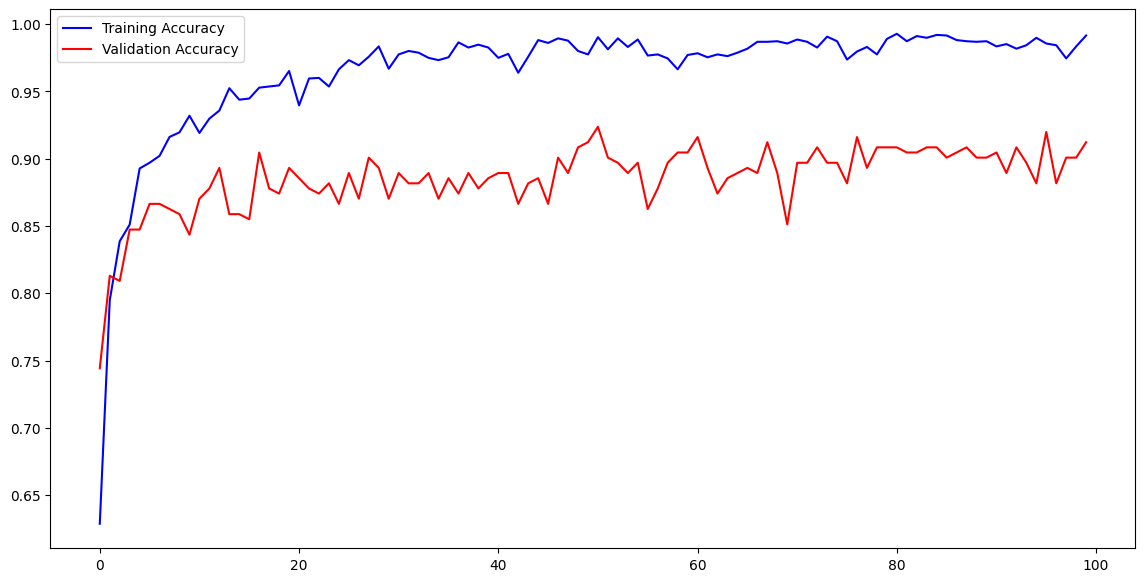

' Training Accuracy:\n\nMeasures how well the model performs on the training data.\nIt increases over epochs as the model learns patterns in the dataset.\nIf it gets too high (near 100%), the model may be overfitting.\n\n Validation Accuracy:\n\nMeasures how well the model performs on unseen validation data.\nIt helps detect overfitting—if training accuracy is high but validation accuracy is low,\nthe model is memorizing instead of generalizing.\nIdeally, validation accuracy should closely follow training accuracy.'

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy", color='blue')
plt.plot(epochs, val_acc, 'r', label="Validation Accuracy")
plt.legend()
plt.show()

""" Training Accuracy:

Measures how well the model performs on the training data.
It increases over epochs as the model learns patterns in the dataset.
If it gets too high (near 100%), the model may be overfitting.

 Validation Accuracy:

Measures how well the model performs on unseen validation data.
It helps detect overfitting—if training accuracy is high but validation accuracy is low,
the model is memorizing instead of generalizing.
Ideally, validation accuracy should closely follow training accuracy."""

In [ ]:
# Save the model to H5 file
model.save('my_model.h5')
